In [2]:
import pandas as pd
df = pd.read_csv("/content/Advertising.csv")
df=df.iloc[:,1:len(df)]
df.head()
#reklam harcamaları sonucunda satışlar
#basit doğrusal regresyon oldugundan bir bagımsız degisken secilmeli, bagımlı degisken -> sales


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
import seaborn as sns


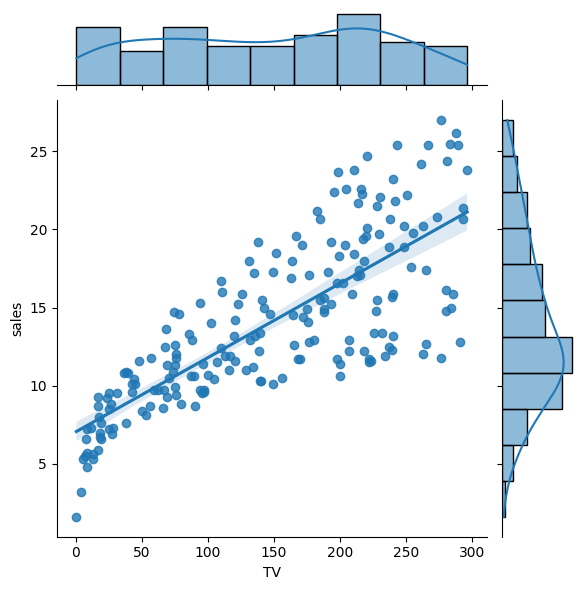

In [7]:
sns.jointplot(x="TV", y="sales",data=df,kind="reg");

In [8]:
from sklearn.linear_model import LinearRegression

In [11]:
x = df[["TV"]]
#bagımsız degiskenimiz

y=df[["sales"]]
#bagımlı degiskenimiz

In [12]:
#model nesnesi oluşturma
reg = LinearRegression()

In [13]:
#modeli kurma(fit)
model = reg.fit(x,y)

In [14]:
model

LinearRegression()

In [17]:
dir(model)
#coef(b1) -> katsayi , intercept(b0) -> sabit

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [18]:
model.intercept_

array([7.03259355])

In [19]:
model.coef_

array([[0.04753664]])

In [20]:
#rkare
model.score(x,y)
#elimizdeki bagımsız degiskenler ile bagımlı degiskenlerin yuzde kacını acıklayabiliyoruz?

0.611875050850071

In [30]:
#tahminde bulun
model.predict([[167.8]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[15.00924181]])

Artıklar ve Makine Öğrenmesindeki Önemi

MSE: hata kareler ortalaması

RMSE: hata kareler ortalamasının karekökü

In [33]:
y.head(10)

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
5,7.2
6,11.8
7,13.2
8,4.8
9,10.6


In [32]:
model.predict(x)[0:6]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232]])

In [36]:
gercek_y = y[0:10]
tahmin_edilen_y=pd.DataFrame(model.predict(x)[0:10])

In [38]:
hatalar = pd.concat([gercek_y, tahmin_edilen_y],axis=1)

In [40]:
hatalar.columns=["gercek_y","tahmin_edilen_y"]

In [42]:
hatalar

,gercek_y,tahmin_edilen_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [44]:
hatalar["hata"]=hatalar["gercek_y"]-hatalar["tahmin_edilen_y"]
hatalar


,gercek_y,tahmin_edilen_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [45]:
hatalar["hata_kareler"]=hatalar["hata"]**2

In [46]:
hatalar

,gercek_y,tahmin_edilen_y,hata,hata_kareler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [48]:
import numpy as np

In [49]:
np.mean(hatalar["hata_kareler"])
#MSE

9.290350329638102